# Part II - Prosper Loans
## by Adam Arce

## Investigation Overview


> The goal of the presentation is present the most compelling figures that support my observation that BorrowerAPR is negatively correlated with CreditScore, AvailableBankcardCredit, and OriginalLoanAmount. Additionally, high-rates are associated with $2000-4000 loans or being unemployed.



## Dataset Overview

> This report is a visual analysis of the Prosper Loan dataset. The data includes more than 100k loans recorded with 81 columns describing both loan and borrower information. I am interested in what factors may affect **BorrowerAPR**.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(0)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load Prosper Loan data .csv into Pandas DataFrame
df = pd.read_csv('data/prosperLoanData.csv')
#Make clean copy
df_clean = df.copy()
#Remove irrelevant columns
df_clean.drop(['ListingNumber', 'LoanStatus', 'ClosedDate', 'ProsperRating (Alpha)', 'ProsperRating (numeric)',
        'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'CreditGrade',
        'ListingCategory (numeric)', 'Occupation', 'EmploymentStatusDuration','ProsperScore',
        'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled','BorrowerState',
        'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines','CreditScoreRangeLower',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
        'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies','AmountDelinquent',
        'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization', 'TotalTrades','DebtToIncomeRatio',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'LoanKey', 
        'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
        'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
        'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding','BorrowerRate',
        'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 
        'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber',
        'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment',
        'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 
        'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 
        'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 
        'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
        'Investors'],axis=1,inplace=True)
#Remove records with missing BorrowerAPR values
df_clean = df_clean[~df_clean.BorrowerAPR.isna()]


## Histogram of BorrowerAPR

> We plot a histogram with binwidth=0.01 and x-limit below 0.45, which omits six outliers. 

>BorrowerAPR forms a right-skewed distribution, with a mean of 0.219.

> The mode forms an isolated peak at 0.358, which may represent a fixed high-rate for certain conditions.



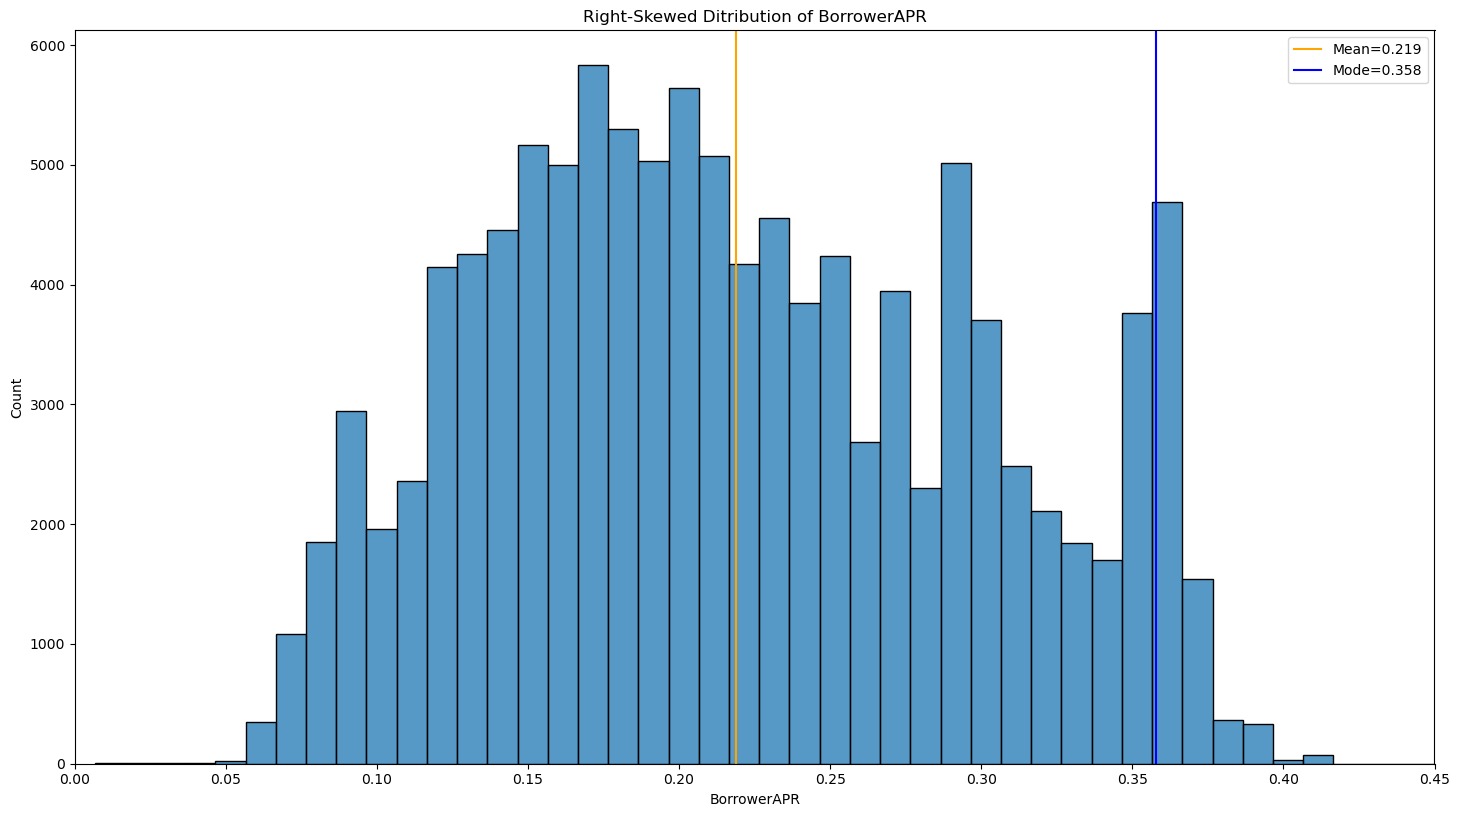

In [11]:
#Using seaborn histplot function
plt.figure(figsize=[14.70,8.27])
sns.histplot(data=df_clean, x="BorrowerAPR",binwidth=0.01)
plt.title('Right-Skewed Ditribution of BorrowerAPR')
plt.axvline(df_clean.BorrowerAPR.mean(),c='orange',label=f'Mean={df_clean.BorrowerAPR.mean():0.3f}')
plt.axvline(df_clean.BorrowerAPR.mode()[0],c='blue',label=f'Mode={df_clean.BorrowerAPR.mode()[0]:0.3f}')
plt.xlim(0,0.45)
plt.tight_layout()
plt.legend()

## Regression model for BorrowerAPR vs. LoanOriginalAmount

> We plot a regression of the mean of x-bins superimposed on a scatter plot of 10,000 sample of the cleaned dataset.

> BorrowerAPR and OriginalLoanAmount are negatvely correlated.

> The scatterplot shows a higher density of smaller OriginalLoanAmount values that average higher rates.

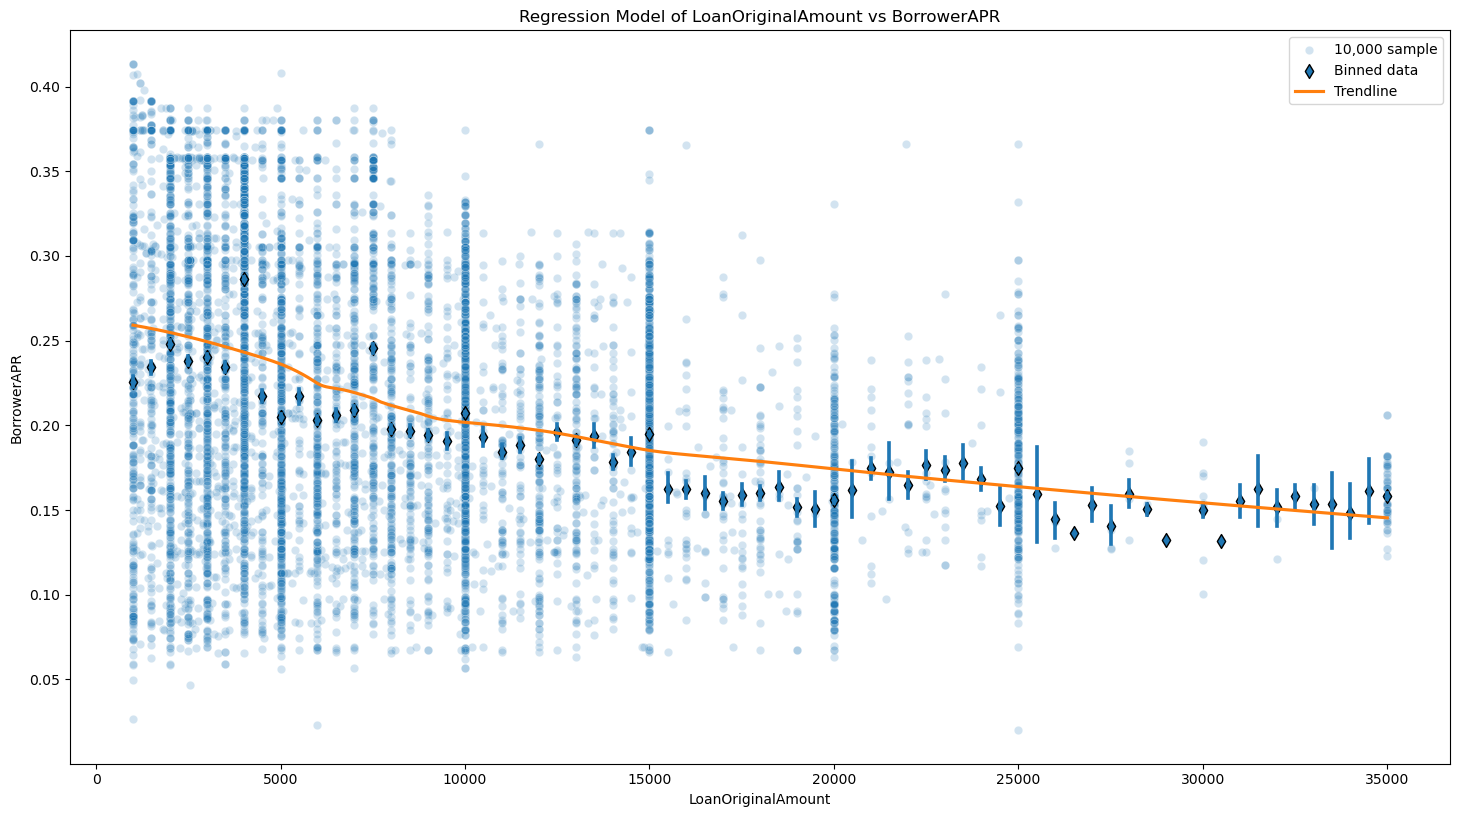

In [12]:
#Using seaborn regplot function
plt.figure(figsize=[14.70,8.27])
sns.scatterplot(data=df_clean.sample(10000), x='LoanOriginalAmount', y='BorrowerAPR',
                alpha=0.2, label='10,000 sample')
sns.regplot(data=df_clean, x='LoanOriginalAmount', y='BorrowerAPR',
            x_bins=np.arange(80)*500,lowess=True,marker='d',scatter_kws={'ec':'black'},
            label='Binned data',line_kws={"color": "C1",'label':'Trendline'})
plt.title('Regression Model of LoanOriginalAmount vs BorrowerAPR')
plt.tight_layout()
plt.legend()

## Correlation matrix for Quantitative Data

> We plot a heatmap of correlation coefficients amoung the quantitative data.

> Similar to OriginalLoanAmount, BorrowerAPR is negatively correlated with CreditScoreRangeUpper and AvailableBankcardCredit.

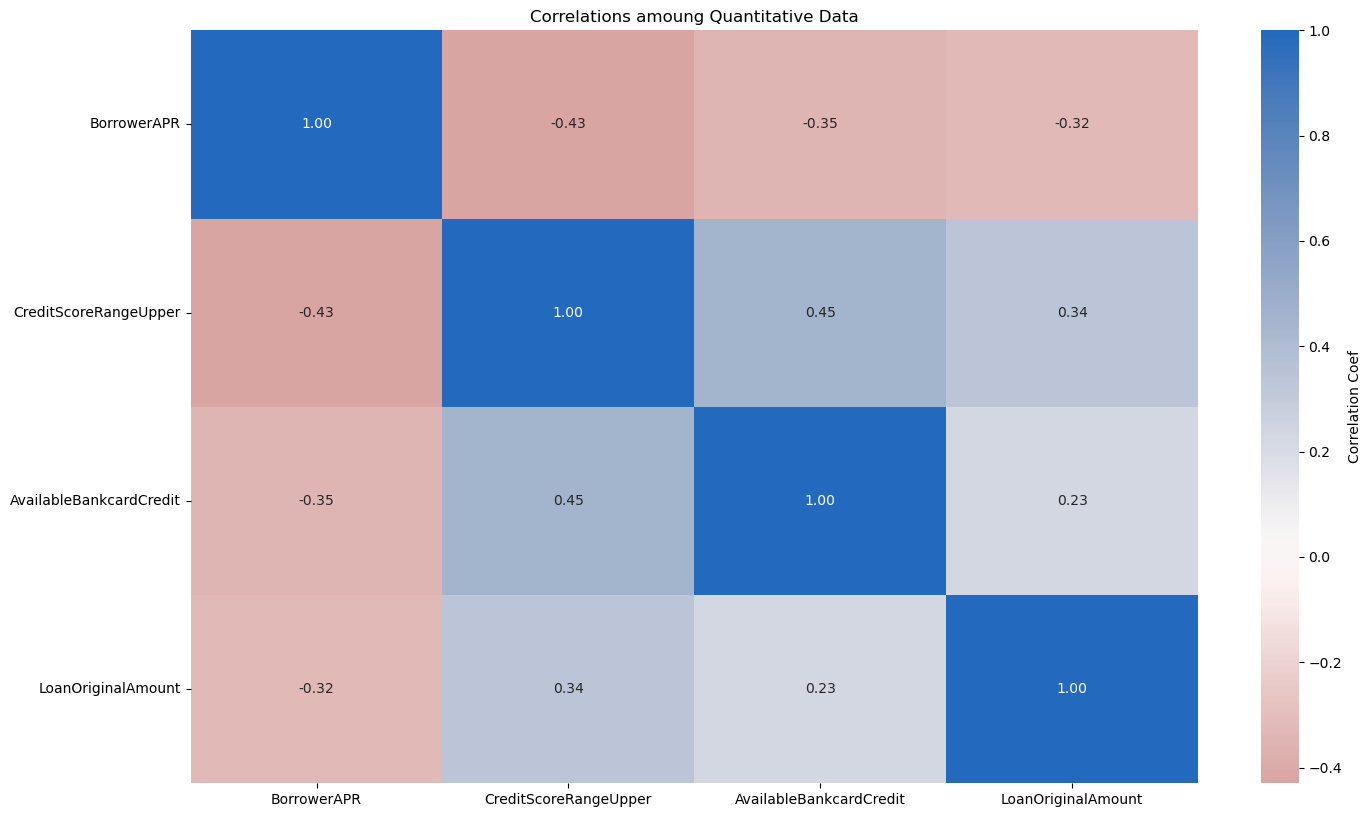

In [13]:
#define group
quan = ['BorrowerAPR','CreditScoreRangeUpper','AvailableBankcardCredit',
        'LoanOriginalAmount']
#Using seaborn heatmap function
plt.figure(figsize=[14.70,8.27])
sns.heatmap(df_clean[quan].corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0,
                cbar_kws={'label': 'Correlation Coef'})
plt.title('Correlations amoung Quantitative Data')
plt.tight_layout()

## BorrowerAPR vs Quantitative Data

> We plot a pointplot of BorrowerAPR vs IncomeRange, while spliting IncomeVerifiable.

> On average, unverified income is assosiated with high rates of BorrowerAPR.



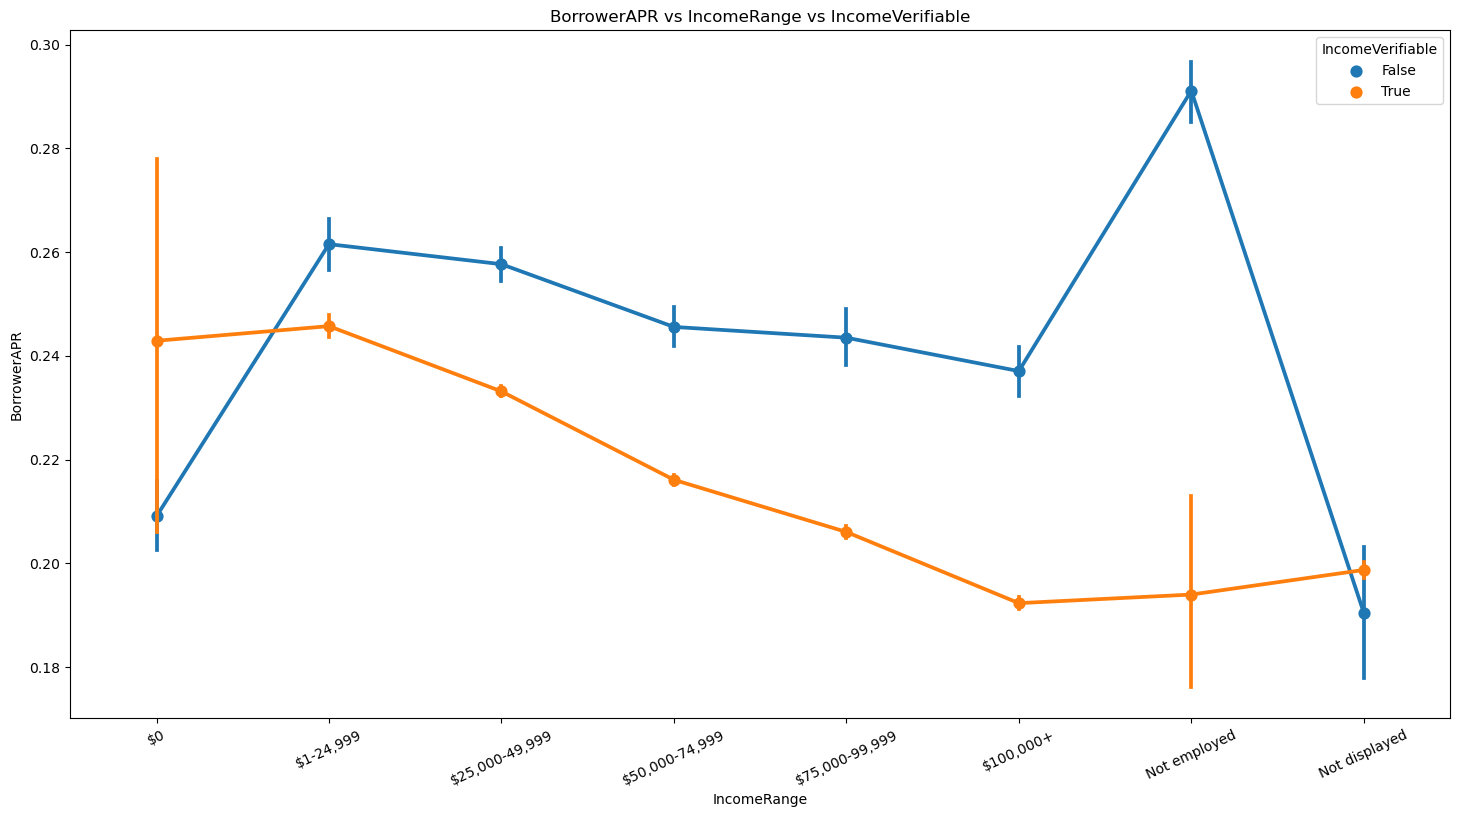

In [14]:
#Using seaborn pointplot function
plt.figure(figsize=[14.70,8.27])
sns.pointplot(data=df_clean,x='IncomeRange',y='BorrowerAPR',hue='IncomeVerifiable',
             order=['$0','$1-24,999','$25,000-49,999','$50,000-74,999',
                             '$75,000-99,999','$100,000+','Not employed','Not displayed'])
plt.xticks(rotation=25)
plt.title('BorrowerAPR vs IncomeRange vs IncomeVerifiable')
plt.tight_layout()

## BorrowerAPR vs EmploymentStatus and IncomeVerifiable

> We plot a facetgrid of BorrowerAPR vs EmploymentStatus and IncomeVerifiable.

> Unverified income exhibits high-rate peaks for all categories of EmploymentStatus, relative to verified income of the same category.



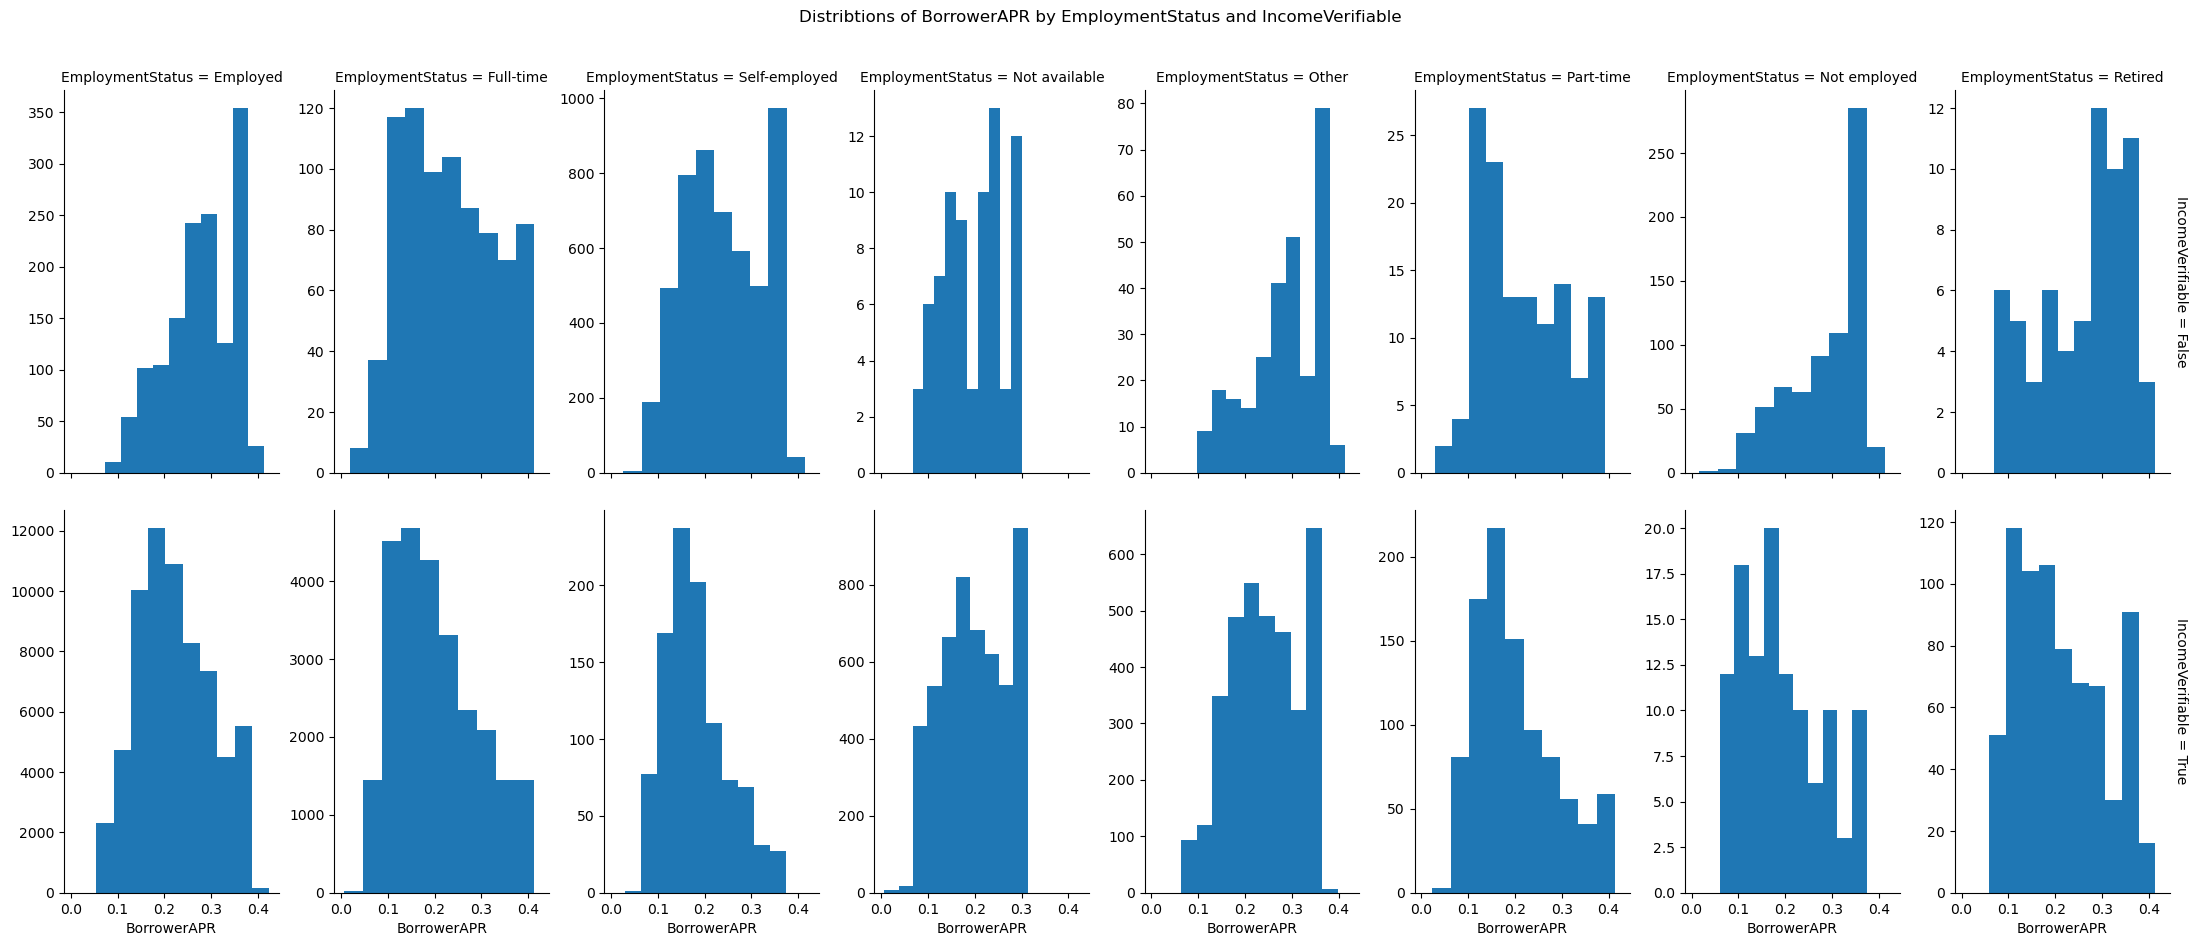

In [23]:
g = sns.FacetGrid(data=df_clean,
                  col='EmploymentStatus',col_order=['Employed','Full-time','Self-employed',
                                                    'Not available','Other','Part-time',
                                                    'Not employed','Retired'], 
                  row='IncomeVerifiable',
                  margin_titles=True, sharey=False)
g.map(plt.hist, 'BorrowerAPR')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribtions of BorrowerAPR by EmploymentStatus and IncomeVerifiable')
g.figure.set_size_inches(22,10)


In [24]:
!jupyter nbconvert Part_II-Prosper_Loans_Slide_Deck.ipynb --to slides  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II-Prosper_Loans_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 1367826 bytes to Part_II-Prosper_Loans_Slide_Deck.slides.html
